In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

C:\Users\natnj\AppData\Local\Temp\ipykernel_34104\1523889086.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# things to graph, make barplots of
# outliers using box plots, distribution of data i.e skewness and normality, data correlation with heatmap
# confusiuon matrix, classification report

In [5]:
df = pd.read_csv('final_neo_data.csv', header=0)
df

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,...,inclination,ascending_node_longitude,orbital_period,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,mean_motion,is_potentially_hazardous_asteroid
0,2003 YG136,8,2.453007e+06,2004-Jan-02 02:01,0.018890,0.018803,0.018978,11.349593,11.337158,< 00:01,...,2.732003,86.207749,348.691948,0.625239,128.194452,1.313826,2.460391e+06,9.713622,1.032430,False
1,2004 AD1,17,2.453008e+06,2004-Jan-03 11:52,0.039728,0.039727,0.039730,12.361220,12.355793,< 00:01,...,6.190628,299.662780,967.229294,0.836564,110.388437,2.991543,2.460712e+06,243.957504,0.372197,False
2,2004 AD,18,2.453008e+06,2004-Jan-03 19:13,0.027346,0.027345,0.027347,7.312034,7.298697,< 00:01,...,7.304636,110.475691,515.565713,0.927806,302.541968,1.588830,2.460188e+06,148.511825,0.698262,False
3,2022 EH4,5,2.453016e+06,2004-Jan-11 07:07,0.024726,0.019411,0.115374,7.153503,7.138423,8_05:32,...,1.887052,250.137012,284.985995,0.603129,82.970020,1.091912,2.460341e+06,75.612376,1.263220,False
4,2004 BA75,9,2.453018e+06,2004-Jan-13 13:11,0.020793,0.020499,0.021088,17.336109,17.328716,00:49,...,3.157099,135.020368,764.868240,0.652319,253.535023,2.621254,2.452970e+06,29.990189,0.470669,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15350,2024 JA3,13,2.460461e+06,2024-May-30 01:37,0.015953,0.015927,0.015978,8.487609,8.467907,00:02,...,8.083261,64.665199,460.913560,0.878329,257.496492,1.457157,2.460521e+06,265.705826,0.781058,False
15351,2024 LB,7,2.460461e+06,2024-May-30 09:46,0.019933,0.019873,0.019994,5.228769,5.203142,< 00:01,...,7.635826,250.013676,517.434001,1.016519,334.800307,1.506193,2.460438e+06,333.841061,0.695741,False
15352,2024 KY,6,2.460461e+06,2024-May-30 19:16,0.009577,0.009565,0.009589,7.175492,7.136614,< 00:01,...,10.501008,69.217708,470.559062,0.958144,129.309828,1.409813,2.460415e+06,348.582819,0.765047,False
15353,2024 KX,2,2.460462e+06,2024-May-31 03:42,0.001944,0.001940,0.001947,8.251181,8.083329,< 00:01,...,10.598101,69.575438,316.062464,0.698943,311.866742,1.117184,2.460558e+06,180.824177,1.139015,False


In [6]:
df.dtypes

des                                   object
orbit_id                              object
jd                                   float64
cd                                    object
dist                                 float64
dist_min                             float64
dist_max                             float64
v_rel                                float64
v_inf                                float64
t_sigma_f                             object
h                                    float64
estimated_diameter_min_km            float64
estimated_diameter_max_km            float64
data_arc_in_days                     float64
observations_used                    float64
orbit_uncertainty                    float64
minimum_orbit_intersection           float64
jupiter_tisserand_invariant          float64
epoch_osculation                     float64
eccentricity                         float64
semi_major_axis                      float64
inclination                          float64
ascending_

In [7]:
# renaming columns for readability
df.rename(columns={
    'estimated_diameter_max_km': 'max_diameter_km',
    'estimated_diameter_min_km': 'min_diameter_km',
    'observations_used': 'obs_used',
    'data_arc_in_days': 'data_arc_days',
    'v_inf': 'velocity_inf',
    'v_rel': 'velocity_rel',
    'inclination': 'incl',
    'dist_min': 'min_dist',
    'dist': 'distance',
    'eccentricity': 'ecc',
    'orbit_uncertainty': 'orbit_unc',
    'h': 'absolute_mag',
    'is_potentially_hazardous_asteroid': 'is_hazardous'
}, inplace=True)

In [8]:
# merging 'max_diameter_km' and 'min_diameter_km' into a single column
df['avg_diameter_km'] = df[['max_diameter_km','min_diameter_km']].mean(axis=1)
df = df.drop(columns=['min_diameter_km', 'max_diameter_km'])
avg_diameter = df.pop('avg_diameter_km')
df.insert(9, 'avg_diameter_km', avg_diameter)
df

,des,orbit_id,jd,cd,distance,min_dist,dist_max,velocity_rel,velocity_inf,avg_diameter_km,...,incl,ascending_node_longitude,orbital_period,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,mean_motion,is_hazardous
0,2003 YG136,8,2.453007e+06,2004-Jan-02 02:01,0.018890,0.018803,0.018978,11.349593,11.337158,0.038507,...,2.732003,86.207749,348.691948,0.625239,128.194452,1.313826,2.460391e+06,9.713622,1.032430,False
1,2004 AD1,17,2.453008e+06,2004-Jan-03 11:52,0.039728,0.039727,0.039730,12.361220,12.355793,0.136001,...,6.190628,299.662780,967.229294,0.836564,110.388437,2.991543,2.460712e+06,243.957504,0.372197,False
2,2004 AD,18,2.453008e+06,2004-Jan-03 19:13,0.027346,0.027345,0.027347,7.312034,7.298697,0.056695,...,7.304636,110.475691,515.565713,0.927806,302.541968,1.588830,2.460188e+06,148.511825,0.698262,False
3,2022 EH4,5,2.453016e+06,2004-Jan-11 07:07,0.024726,0.019411,0.115374,7.153503,7.138423,0.044416,...,1.887052,250.137012,284.985995,0.603129,82.970020,1.091912,2.460341e+06,75.612376,1.263220,False
4,2004 BA75,9,2.453018e+06,2004-Jan-13 13:11,0.020793,0.020499,0.021088,17.336109,17.328716,0.055404,...,3.157099,135.020368,764.868240,0.652319,253.535023,2.621254,2.452970e+06,29.990189,0.470669,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15350,2024 JA3,13,2.460461e+06,2024-May-30 01:37,0.015953,0.015927,0.015978,8.487609,8.467907,0.043606,...,8.083261,64.665199,460.913560,0.878329,257.496492,1.457157,2.460521e+06,265.705826,0.781058,False
15351,2024 LB,7,2.460461e+06,2024-May-30 09:46,0.019933,0.019873,0.019994,5.228769,5.203142,0.013475,...,7.635826,250.013676,517.434001,1.016519,334.800307,1.506193,2.460438e+06,333.841061,0.695741,False
15352,2024 KY,6,2.460461e+06,2024-May-30 19:16,0.009577,0.009565,0.009589,7.175492,7.136614,0.022467,...,10.501008,69.217708,470.559062,0.958144,129.309828,1.409813,2.460415e+06,348.582819,0.765047,False
15353,2024 KX,2,2.460462e+06,2024-May-31 03:42,0.001944,0.001940,0.001947,8.251181,8.083329,0.012576,...,10.598101,69.575438,316.062464,0.698943,311.866742,1.117184,2.460558e+06,180.824177,1.139015,False


In [9]:
df.describe()

,jd,distance,min_dist,dist_max,velocity_rel,velocity_inf,avg_diameter_km,absolute_mag,data_arc_days,obs_used,...,semi_major_axis,incl,ascending_node_longitude,orbital_period,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,mean_motion
count,1.535500e+04,15355.000000,15355.000000,15355.000000,15355.000000,15338.000000,15067.000000,15353.000000,14795.000000,15067.000000,...,15067.000000,15067.000000,15067.000000,15067.000000,15067.000000,15067.000000,15067.000000,1.506700e+04,15067.000000,15067.000000
mean,2.458083e+06,0.022289,0.021397,0.025299,10.512379,10.473006,0.039010,25.900987,266.157688,54.354218,...,1.545457,7.336389,170.528986,730.630252,0.845683,185.370806,2.245232,2.459651e+06,169.756345,0.631984
std,1.905665e+03,0.014404,0.014186,0.023255,5.114278,5.122418,0.047031,1.941013,1001.134106,63.963130,...,0.515408,7.013980,104.331919,363.418755,0.169080,102.918017,0.989039,1.543298e+03,124.930265,0.319148
min,2.453007e+06,0.000045,0.000000,0.000045,0.437707,0.125474,0.000985,14.100000,1.000000,4.000000,...,0.610036,0.006073,0.047555,174.032891,0.087375,0.036183,0.980958,2.452260e+06,0.006194,0.143254
25%,2.456974e+06,0.009515,0.008798,0.009863,7.013678,6.974231,0.016351,24.860000,3.000000,24.000000,...,1.113308,2.525940,74.667739,429.063186,0.755756,96.213598,1.380641,2.459690e+06,43.079766,0.365803
50%,2.458640e+06,0.020938,0.019829,0.021808,9.520106,9.491466,0.026518,26.000000,8.000000,37.000000,...,1.451478,5.325527,173.693341,638.725021,0.894108,194.140986,2.019900,2.460286e+06,159.186517,0.563623
75%,2.459587e+06,0.034236,0.032964,0.036085,13.162863,13.127337,0.044621,27.100000,19.000000,62.000000,...,1.936295,9.515781,247.918188,984.137340,0.980061,273.788917,2.988074,2.460454e+06,297.683003,0.839037
max,2.460462e+06,0.049996,0.049987,0.334483,40.190937,40.186533,0.915256,33.200000,24907.000000,2171.000000,...,3.617417,66.212044,359.976550,2513.022466,1.073751,359.922324,6.884900,2.461403e+06,359.899018,2.068575


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15355 entries, 0 to 15354
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   des                          15355 non-null  object 
 1   orbit_id                     15355 non-null  object 
 2   jd                           15355 non-null  float64
 3   cd                           15355 non-null  object 
 4   distance                     15355 non-null  float64
 5   min_dist                     15355 non-null  float64
 6   dist_max                     15355 non-null  float64
 7   velocity_rel                 15355 non-null  float64
 8   velocity_inf                 15338 non-null  float64
 9   avg_diameter_km              15067 non-null  float64
 10  t_sigma_f                    15355 non-null  object 
 11  absolute_mag                 15353 non-null  float64
 12  data_arc_days                14795 non-null  float64
 13  obs_used        

In [11]:
nan_count = np.sum(df.isnull(),axis = 0) # checking amount of NaN values
nan_count

des                              0
orbit_id                         0
jd                               0
cd                               0
distance                         0
min_dist                         0
dist_max                         0
velocity_rel                     0
velocity_inf                    17
avg_diameter_km                288
t_sigma_f                        0
absolute_mag                     2
data_arc_days                  560
obs_used                       288
orbit_unc                      288
minimum_orbit_intersection     288
jupiter_tisserand_invariant    288
epoch_osculation               288
ecc                            288
semi_major_axis                288
incl                           288
ascending_node_longitude       288
orbital_period                 288
perihelion_distance            288
perihelion_argument            288
aphelion_distance              288
perihelion_time                288
mean_anomaly                   288
mean_motion         

In [12]:
df = df.dropna() # dropping rows with nan values, could consider filling in and replacing values

In [13]:
df.shape

(14778, 30)

In [14]:
nan_count = np.sum(df.isnull(),axis = 0)
nan_count

des                            0
orbit_id                       0
jd                             0
cd                             0
distance                       0
min_dist                       0
dist_max                       0
velocity_rel                   0
velocity_inf                   0
avg_diameter_km                0
t_sigma_f                      0
absolute_mag                   0
data_arc_days                  0
obs_used                       0
orbit_unc                      0
minimum_orbit_intersection     0
jupiter_tisserand_invariant    0
epoch_osculation               0
ecc                            0
semi_major_axis                0
incl                           0
ascending_node_longitude       0
orbital_period                 0
perihelion_distance            0
perihelion_argument            0
aphelion_distance              0
perihelion_time                0
mean_anomaly                   0
mean_motion                    0
is_hazardous                   0
dtype: int

In [15]:
df = df.drop(columns=['des','orbit_id','cd','t_sigma_f']) # dropping columns that may be irrelevant for prediction
df

,jd,distance,min_dist,dist_max,velocity_rel,velocity_inf,avg_diameter_km,absolute_mag,data_arc_days,obs_used,...,incl,ascending_node_longitude,orbital_period,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,mean_motion,is_hazardous
0,2.453007e+06,0.018890,0.018803,0.018978,11.349593,11.337158,0.038507,25.24,4.0,21.0,...,2.732003,86.207749,348.691948,0.625239,128.194452,1.313826,2.460391e+06,9.713622,1.032430,False
1,2.453008e+06,0.039728,0.039727,0.039730,12.361220,12.355793,0.136001,22.50,5708.0,74.0,...,6.190628,299.662780,967.229294,0.836564,110.388437,2.991543,2.460712e+06,243.957504,0.372197,False
2,2.453008e+06,0.027346,0.027345,0.027347,7.312034,7.298697,0.056695,24.40,26.0,90.0,...,7.304636,110.475691,515.565713,0.927806,302.541968,1.588830,2.460188e+06,148.511825,0.698262,False
3,2.453016e+06,0.024726,0.019411,0.115374,7.153503,7.138423,0.044416,24.93,11.0,42.0,...,1.887052,250.137012,284.985995,0.603129,82.970020,1.091912,2.460341e+06,75.612376,1.263220,False
4,2.453018e+06,0.020793,0.020499,0.021088,17.336109,17.328716,0.055404,24.45,4.0,14.0,...,3.157099,135.020368,764.868240,0.652319,253.535023,2.621254,2.452970e+06,29.990189,0.470669,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15350,2.460461e+06,0.015953,0.015927,0.015978,8.487609,8.467907,0.043606,24.97,17.0,66.0,...,8.083261,64.665199,460.913560,0.878329,257.496492,1.457157,2.460521e+06,265.705826,0.781058,False
15351,2.460461e+06,0.019933,0.019873,0.019994,5.228769,5.203142,0.013475,27.52,14.0,41.0,...,7.635826,250.013676,517.434001,1.016519,334.800307,1.506193,2.460438e+06,333.841061,0.695741,False
15352,2.460461e+06,0.009577,0.009565,0.009589,7.175492,7.136614,0.022467,26.41,6.0,43.0,...,10.501008,69.217708,470.559062,0.958144,129.309828,1.409813,2.460415e+06,348.582819,0.765047,False
15353,2.460462e+06,0.001944,0.001940,0.001947,8.251181,8.083329,0.012576,27.67,2.0,23.0,...,10.598101,69.575438,316.062464,0.698943,311.866742,1.117184,2.460558e+06,180.824177,1.139015,False


In [16]:
label_encoder = LabelEncoder() # converting label column to numerical format i.e 0 or 1
df['is_hazardous'] = label_encoder.fit_transform(df['is_hazardous'])
df

,jd,distance,min_dist,dist_max,velocity_rel,velocity_inf,avg_diameter_km,absolute_mag,data_arc_days,obs_used,...,incl,ascending_node_longitude,orbital_period,perihelion_distance,perihelion_argument,aphelion_distance,perihelion_time,mean_anomaly,mean_motion,is_hazardous
0,2.453007e+06,0.018890,0.018803,0.018978,11.349593,11.337158,0.038507,25.24,4.0,21.0,...,2.732003,86.207749,348.691948,0.625239,128.194452,1.313826,2.460391e+06,9.713622,1.032430,0
1,2.453008e+06,0.039728,0.039727,0.039730,12.361220,12.355793,0.136001,22.50,5708.0,74.0,...,6.190628,299.662780,967.229294,0.836564,110.388437,2.991543,2.460712e+06,243.957504,0.372197,0
2,2.453008e+06,0.027346,0.027345,0.027347,7.312034,7.298697,0.056695,24.40,26.0,90.0,...,7.304636,110.475691,515.565713,0.927806,302.541968,1.588830,2.460188e+06,148.511825,0.698262,0
3,2.453016e+06,0.024726,0.019411,0.115374,7.153503,7.138423,0.044416,24.93,11.0,42.0,...,1.887052,250.137012,284.985995,0.603129,82.970020,1.091912,2.460341e+06,75.612376,1.263220,0
4,2.453018e+06,0.020793,0.020499,0.021088,17.336109,17.328716,0.055404,24.45,4.0,14.0,...,3.157099,135.020368,764.868240,0.652319,253.535023,2.621254,2.452970e+06,29.990189,0.470669,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15350,2.460461e+06,0.015953,0.015927,0.015978,8.487609,8.467907,0.043606,24.97,17.0,66.0,...,8.083261,64.665199,460.913560,0.878329,257.496492,1.457157,2.460521e+06,265.705826,0.781058,0
15351,2.460461e+06,0.019933,0.019873,0.019994,5.228769,5.203142,0.013475,27.52,14.0,41.0,...,7.635826,250.013676,517.434001,1.016519,334.800307,1.506193,2.460438e+06,333.841061,0.695741,0
15352,2.460461e+06,0.009577,0.009565,0.009589,7.175492,7.136614,0.022467,26.41,6.0,43.0,...,10.501008,69.217708,470.559062,0.958144,129.309828,1.409813,2.460415e+06,348.582819,0.765047,0
15353,2.460462e+06,0.001944,0.001940,0.001947,8.251181,8.083329,0.012576,27.67,2.0,23.0,...,10.598101,69.575438,316.062464,0.698943,311.866742,1.117184,2.460558e+06,180.824177,1.139015,0


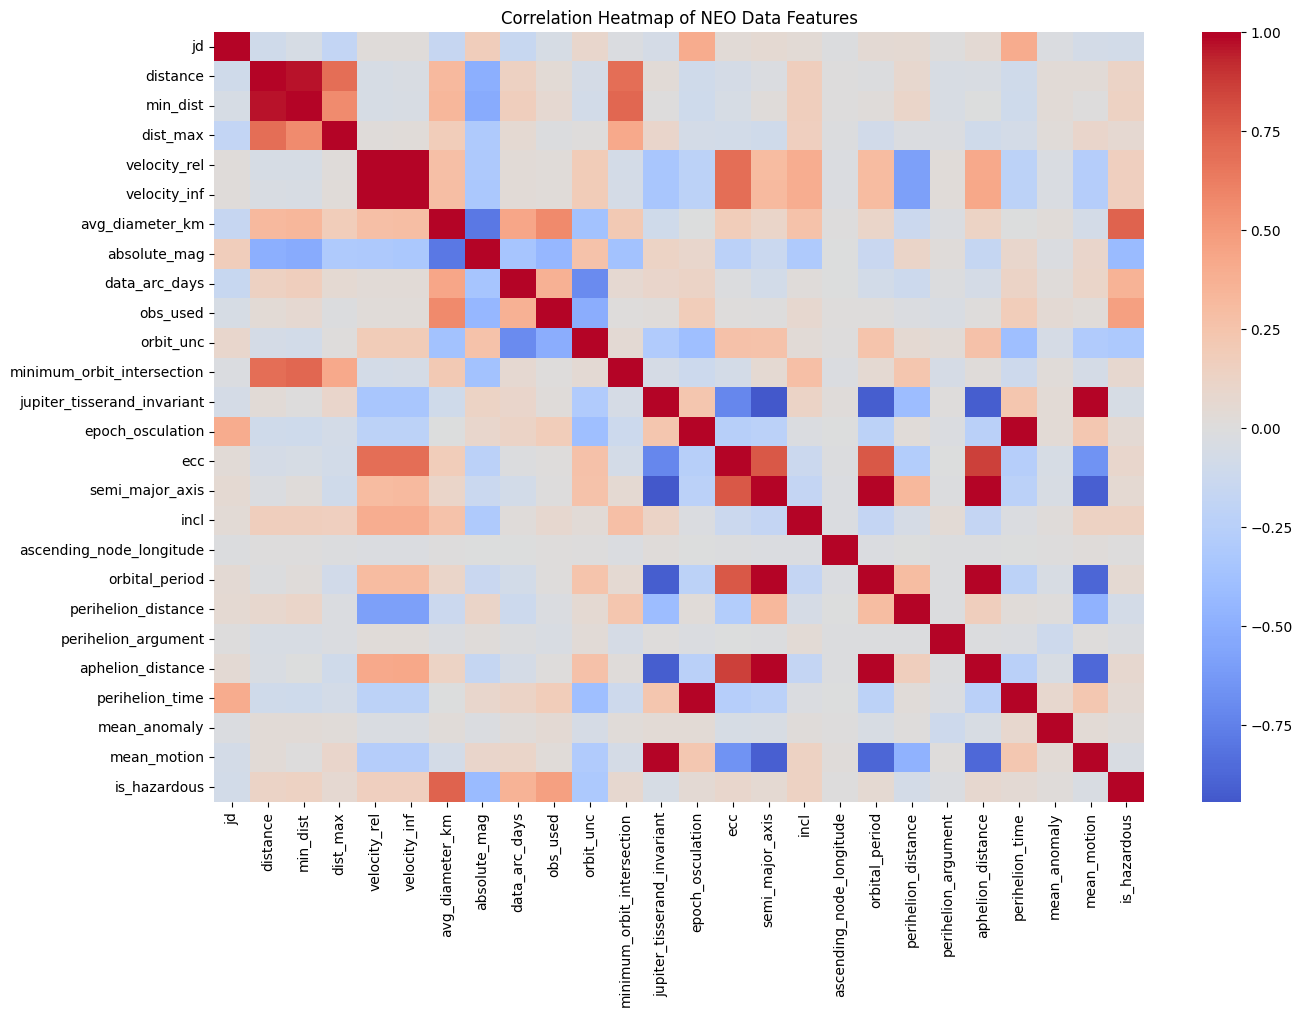

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of NEO Data Features')
plt.show()

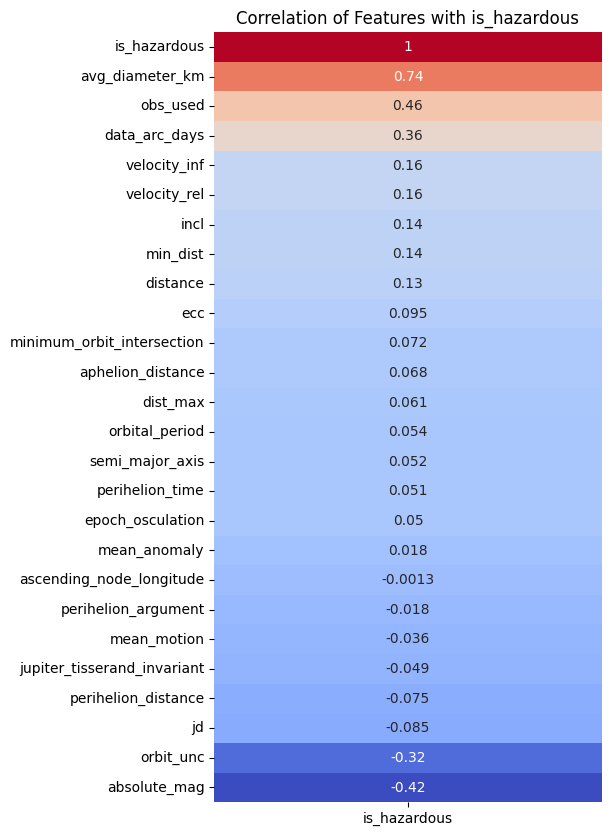

In [20]:
filtered_corr_matrix = correlation_matrix[['is_hazardous']].sort_values(by='is_hazardous',ascending=False)
plt.figure(figsize=(5,10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation of Features with is_hazardous')
plt.show()